data shape:  (1000, 50) (1000, 1)
Estimator approximated by LS: 59.51363648298142


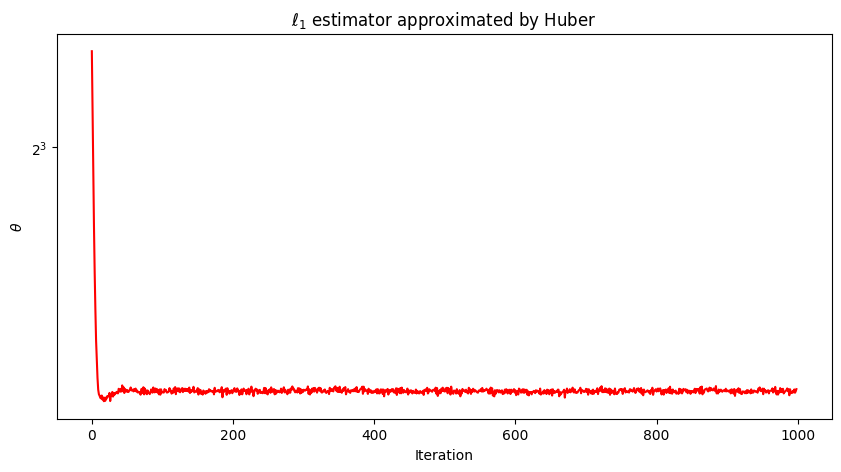

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

d = 50   #feature dimension

X = np.load('data/X.npy')
y = np.load('data/y.npy')
print ("data shape: ", X.shape, y.shape)

theta_star = np.load('data/theta_star.npy')

###### part (1): least square estimator ########

theta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

Error_LS = np.linalg.norm(theta_hat - theta_star, 2)
print('Estimator approximated by LS:',Error_LS)

###### part (2): L1 estimator ########
mu = 1e-5  # smoothing parameter
alpha = 0.001  # stepsize
T = 1000  # iteration number

# define the gradient of the l1 loss
def gradient(X, theta, y, mu):
    grad = np.zeros(X.shape)
    for i in range(len(X)):
        if abs(X[i,:].T @ theta - y[i]) > mu:
            temp = np.sign(X[i,:].T @ theta - y[i]) * X[i,:]
            # print(list(temp))
            grad[i,:] = list(temp)
        else:
            temp = (X[i,:].T @ theta - y[i])/mu * X[i,:]
            grad[i,:] = list(temp)
    return grad.sum(0).reshape(50,1)

# random initialization
theta = np.random.randn(d,1)

Error_huber = []

for _ in range(1, T):

    # calculate the l2 error of the current iteration
    Error_huber.append(np.linalg.norm(theta-theta_star, 2))

    grad = gradient(X, theta, y, mu)

    #gradient descent update
    theta = theta - alpha * grad
    
#######   plot the figure   #########
plt.figure(figsize=(10,5))
plt.yscale('log',base=2) 
plt.plot(Error_huber, 'r-')
plt.title(r'$\ell_1$ estimator approximated by Huber')
plt.ylabel(r'$\theta$')               # set the label for the y axis
plt.xlabel('Iteration')              # set the label for the x axis
plt.show()